In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [186]:
gs1 = pd.read_csv("MLP_GS1_results.csv")
gs2 = pd.read_csv("MLP_GS2_results.csv")
gs3 = pd.read_csv("MLP_GS3_results.csv")


In [187]:
gs_tot = pd.concat([gs2, gs3, gs1], ignore_index=True)
gs_tot["Unnamed: 0"].astype(int)
gs_tot["mean_test_score"] = np.abs(gs_tot["mean_test_score"])
#gs_tot.sort_values(["param_activation", "Unnamed: 0"], inplace=True)
gs_tot.drop_duplicates(["params"], inplace=True)

In [188]:
gs_tot

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,365.856645,52.111324,0.168600,0.007088,tanh,30,700,adam,"{'activation': 'tanh', 'hidden_layer_sizes': 3...",-5.713458,-5.930514,-5.920156,-5.963399,-6.082738,5.922053,0.119261,16
1,1,611.078602,129.600308,0.327379,0.009707,tanh,60,700,adam,"{'activation': 'tanh', 'hidden_layer_sizes': 6...",-5.143725,-5.131333,-5.120755,-5.119097,-5.090829,5.121148,0.017533,14
2,2,754.007457,257.478753,0.518396,0.043721,tanh,90,700,adam,"{'activation': 'tanh', 'hidden_layer_sizes': 9...",-4.850821,-4.818425,-4.753012,-4.964020,-4.844213,4.846098,0.068355,13
3,3,5323.950475,2288.440185,3.418745,0.429891,tanh,600,700,adam,"{'activation': 'tanh', 'hidden_layer_sizes': 6...",-4.141431,-4.305790,-4.112903,-4.128502,-4.196307,4.176986,0.070264,6
4,4,572.796049,98.119428,0.371878,0.034797,tanh,"(30, 30)",700,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",-4.713269,-4.786274,-4.685805,-4.716637,-4.674915,4.715380,0.038843,11
5,5,855.622647,85.715518,0.653123,0.018216,tanh,"(60, 60)",700,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",-4.342516,-4.410211,-4.324302,-4.351843,-4.340246,4.353824,0.029554,8
6,6,1913.509882,298.025278,1.318751,0.114648,tanh,"(100, 100)",700,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",-4.169361,-4.105982,-4.093369,-4.097299,-4.155221,4.124246,0.031648,5
7,7,5093.144394,2103.221940,2.415616,0.088164,tanh,"(200, 200)",700,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",-3.988550,-4.068277,-3.953683,-3.975818,-4.097352,4.016736,0.055857,3
8,8,1053.271584,119.496663,0.303123,0.021194,logistic,30,700,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",-5.454117,-5.350595,-5.526233,-5.401088,-5.253761,5.397159,0.092359,15
9,9,1807.858017,106.815779,0.668750,0.086946,logistic,60,700,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",-4.755265,-4.696929,-4.714902,-4.769394,-4.745442,4.736386,0.026632,12


In [189]:
gs_tot.drop(index=gs_tot[gs_tot["param_hidden_layer_sizes"] == "30" ].index, inplace=True)
gs_tot.drop(index=gs_tot[gs_tot["param_hidden_layer_sizes"] == "60" ].index, inplace=True)
gs_tot.drop(index=gs_tot[gs_tot["param_hidden_layer_sizes"] == "90" ].index, inplace=True)
#gs_tot.drop(index=gs_tot[gs_tot["param_hidden_layer_sizes"] == "(30, 30)" ].index, inplace=True)

In [190]:
def sort_size(a, b):
    a_list = list(filter(None, re.split(r"\D| ", str(a))))
    b_list = list(filter(None, re.split(r"\D| ", str(b))))
    if(len(a) != len(b)):
        return len(a) - len(b)
    return int(a_list[0]) - int(b_list[0])

def sort_key(x):
    x_list = list(filter(None, re.split(r"\D| ", str(x))))
    return 10000 *(len(x_list)-1)+ int(x_list[0])

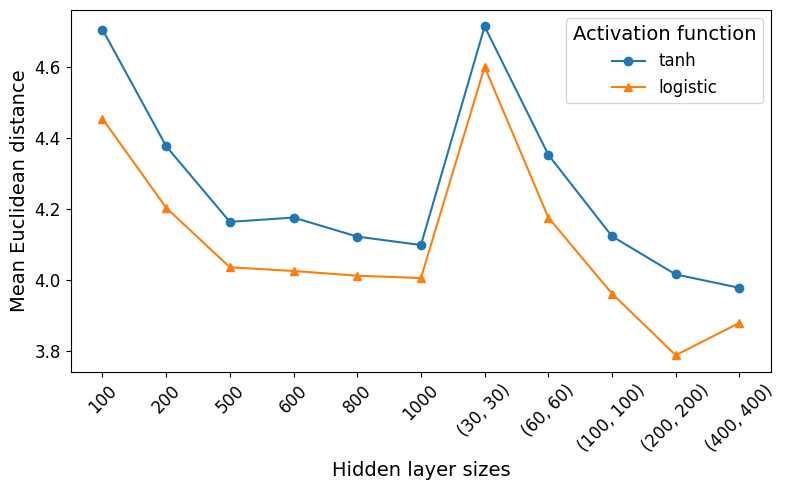

In [200]:
activations = tuple(gs_tot["param_activation"].drop_duplicates())
sizes = list(gs_tot["param_hidden_layer_sizes"].drop_duplicates())
sizes.sort(key=lambda x: sort_key(x))
sizes_idx = { sizes[i]:i for i in range(len(sizes))}

plt.figure(figsize=(8, 5))

for act, mark in zip(activations, ["o", "^"]):
    scores=gs_tot.loc[gs_tot["param_activation"]==act][["mean_test_score", "param_hidden_layer_sizes"]]
    scores['xpos']=list(map(lambda x: sizes_idx[x], scores["param_hidden_layer_sizes"]))
    scores.sort_values("xpos", inplace=True)
    plt.plot(scores["xpos"], scores["mean_test_score"], marker=mark)

plt.xticks([sizes_idx[i] for i in sizes], sizes, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hidden layer sizes", fontsize=14)
plt.ylabel("Mean Euclidean distance", fontsize=14)
legend = plt.legend(activations, title="Activation function", fontsize=12)
plt.setp(legend.get_title(),fontsize=14)
plt.tight_layout()
plt.savefig("mlp_gridsearch_results_tot.pdf", format="pdf")

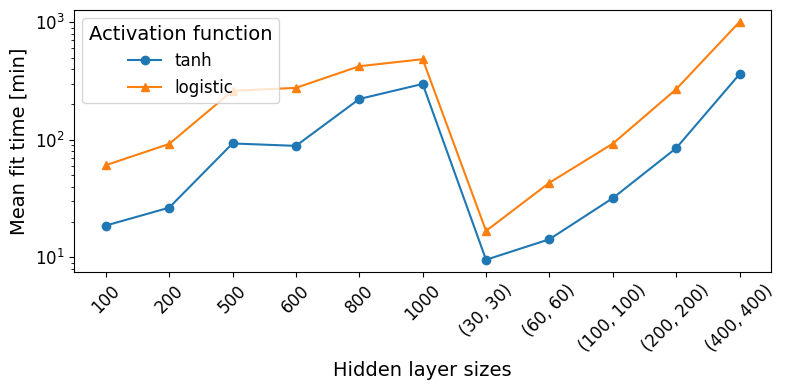

In [196]:
activations = tuple(gs_tot["param_activation"].drop_duplicates())
sizes = list(gs_tot["param_hidden_layer_sizes"].drop_duplicates())
sizes.sort(key=lambda x: sort_key(x))
sizes_idx = { sizes[i]:i for i in range(len(sizes))}

plt.figure(figsize=(8, 4))

for act, mark in zip(activations, ["o", "^"]):
    scores=gs_tot.loc[gs_tot["param_activation"]==act][["mean_fit_time", "param_hidden_layer_sizes"]]
    scores['xpos']=list(map(lambda x: sizes_idx[x], scores["param_hidden_layer_sizes"]))
    scores.sort_values("xpos", inplace=True)
    plt.plot(scores["xpos"], scores["mean_fit_time"]/60, marker=mark)

plt.yscale("log")
plt.xticks([sizes_idx[i] for i in sizes], sizes, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hidden layer sizes", fontsize=14)
plt.ylabel("Mean fit time [min]", fontsize=14)
legend = plt.legend(activations, title="Activation function", fontsize=12)
plt.setp(legend.get_title(),fontsize=14)
plt.tight_layout()
plt.savefig("mlp_gridsearch_times_tot.pdf", format="pdf")